In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import numpy as np

# Clase 1.

## Bank

* haz DecisionTreeClassifier
* log.regression
* RandomForestClassifier

In [37]:
df = pd.read_csv('/content/bank-full.csv', sep=';')

In [38]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [39]:
#Tengo q quitar DURATION pq como yo voy a saber cuanto a durar la llamada para hacer predicion. no me sirve, debo eliminarlo

df = df.drop(columns=["duration"], axis=1) #lo mismo q: del bank["duration"]

In [40]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,4,-1,0,unknown,no


In [41]:
df.shape

(45211, 16)

<Axes: xlabel='balance', ylabel='y'>

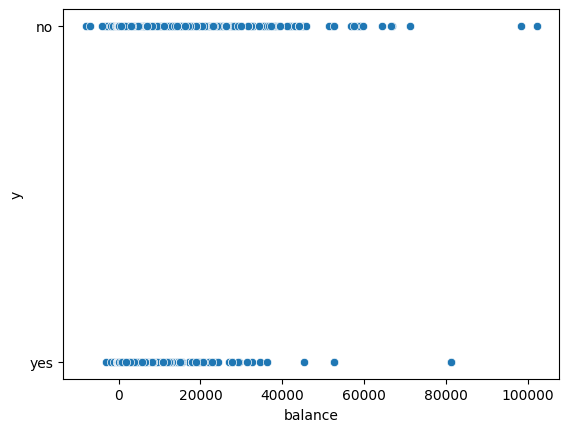

In [42]:
sns.scatterplot(x=df.balance, y=df.y)

In [10]:
df["y"] = df["y"].map({"no": 0, "yes": 1})

In [11]:
job_dummies = pd.get_dummies(df["job"], prefix="job", drop_first=True)

In [12]:
marital_dummies = pd.get_dummies(df["marital"], prefix="marital", drop_first=True)

In [13]:
education_dummies = pd.get_dummies(df["education"], prefix="edu", drop_first=True)

In [14]:
contact_dummies = pd.get_dummies(df["contact"], prefix="contact", drop_first=True)

In [15]:
month_dummies = pd.get_dummies(df["month"], prefix="month", drop_first=True)

In [16]:
poutcome_dummies = pd.get_dummies(df["poutcome"], prefix="poutcome", drop_first=True)

In [28]:
df["housing"] = df["housing"].map({"no": 0, "yes": 1})

In [29]:
df["default"] = df["default"].map({"no": 0, "yes": 1})

In [30]:
df["loan"] = df["loan"].map({"no": 0, "yes": 1})

In [44]:
#tmb se puede hacer todos dummies de una:
bank_dummies = pd.get_dummies( df[['job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month', 'poutcome']],
    drop_first=True
)

In [45]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


In [47]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [52]:
X = pd.concat([
    df[["age","balance","day","campaign","pdays","previous"]],
    bank_dummies
], axis=1)

#pd.concat = unir varios DataFrames o Series uno al lado del otro

y = df["y"]

In [48]:
log = LogisticRegression()

In [49]:
log.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [56]:
X_train.shape

(36168, 41)

In [57]:
y_train.shape

(36168,)

In [58]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.8267167975229459

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, tree.predict(X_test))
acc = accuracy_score(y_test, tree.predict(X_test))
print(acc)

0.8267167975229459


In [61]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
log.score(X_test, y_test)

0.8891960632533451

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# crear modelo
tree = DecisionTreeClassifier()

# entrenar
tree.fit(X_train, y_train)

# accuracy
print(tree.score(X_test, y_test))

# matriz de confusión
print(confusion_matrix(y_test, tree.predict(X_test)))

# classification report
print(classification_report(y_test, tree.predict(X_test)))

0.8277120424637842
[[7163  851]
 [ 707  322]]
              precision    recall  f1-score   support

          no       0.91      0.89      0.90      8014
         yes       0.27      0.31      0.29      1029

    accuracy                           0.83      9043
   macro avg       0.59      0.60      0.60      9043
weighted avg       0.84      0.83      0.83      9043



🟦 1. **Matriz de confusión** 👉 El modelo acierta bastante bien con los que dicen NO. PERO 👉  falla muchísimo detectando a los clientes que SÍ contratarían.

* 7163 → TRUE NEGATIVES
*	851 → FALSE POSITIVES
* 707 → FALSE NEGATIVES
* 322 → TRUE POSITIVES

Esto es típico de datasets **desbalanceados** (solo ~11% de “yes”).

⸻

🟦 2. **Classification report**

**Para “no”** --- modelo clasifica muy bien a quienes NO contratan.

* precision = 0.91
* recall    = 0.89
* f1-score  = 0.90

✔


**Para “yes”** ----modelo casi no encuentra a los potenciales clientes (muy mal recall).

* precision = 0.27→ de cada 100 que el modelo dice “sí”, solo 27 realmente son “sí”.
* recall    = 0.31→ el modelo solo encuentra el 31% de los clientes que realmente dirían “sí”.
* f1-score  = 0.29



⸻

🟦 3. **Accuracy** = 0.83 pq el dataset está muy desbalanceado ya q 	89% “no” y 11% “yes”.

* acertar MUCHO en “no” y aun así ser “bueno” en accuracy.
* Accuracy no sirve para evaluar datasets desbalanceados.

⸻

🟦 4. **Macro avg vs Weighted avg**

* Macro avg = 0.60 --> Promedio simple entre clases. Esto refleja que la clase yes está yendo mal.

* Weighted avg = 0.83 --> Promedia pesando x la cantidad de cada clase → domina la clase “no”.

Por eso casi coincide con accuracy.

⸻

🟦 RESUMEN

Métrica	Significado
El modelo es muy bueno prediciendo “no”	(alta precision y recall para “no”)
El modelo es muy malo prediciendo “yes”	(solo 31% recall)
Accuracy = 0.83 es engañoso	el dataset está desbalanceado
Necesitas técnicas especiales	para mejorar la clase yes


⸻

🟩  Para mejorar la clase “yes”, se usan:

✅ SMOTE (oversampling)

* from imblearn.over_sampling import SMOTE
* X_res, y_res = SMOTE().fit_resample(X, y)

✅ Class weights

* model = LogisticRegression(class_weight="balanced")

✅ Threshold tuning
* Modificar el corte 0.5 → 0.3 o 0.25

✅ Modelos más potentes
* RandomForest, XGBoost, GradientBoosting.



In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

rf = RandomForestClassifier()

# entrenar
rf.fit(X_train, y_train)

# accuracy
print(rf.score(X_test, y_test))

# matriz de confusión
print(confusion_matrix(y_test, rf.predict(X_test)))

# classification report
print(classification_report(y_test, rf.predict(X_test)))

0.8951675328983745
[[7865  149]
 [ 799  230]]
              precision    recall  f1-score   support

          no       0.91      0.98      0.94      8014
         yes       0.61      0.22      0.33      1029

    accuracy                           0.90      9043
   macro avg       0.76      0.60      0.63      9043
weighted avg       0.87      0.90      0.87      9043



⭐  **Accuracy**: 0.90 --> Muy alta, pero recordamos el dataset está desbalanceado.

⸻

⭐ **Matriz de confusión**
*	Predice “no” casi perfecto (muy pocas veces se equivoca).
*	Predice “yes” mejor que antes, pero aún falla mucho.

⸻

⭐ **Métricas por clase**

🟦 Clase no 👉 El modelo identifica casi todos los NO correctamente.
* precision = 0.91
* recall = 0.98
* f1-score = 0.94

🟩 Clase yes (la que importa)👉 Ha mejorado la precision (más fiables los “sí” que predice).
👉 Pero recall sigue bajo: solo detecta el 22% de los clientes que realmente dirían “yes”.
* precision = 0.61
* recall = 0.22
* f1 = 0.33

⸻

⭐ **Conclusión** -->ha mejorado que antes detectando “yes”, pero aún se pierde la mayoría de los clientes potenciales.
Para arreglarlo mas podriamos hacer:
* SMOTE
* threshold tuning
* XGBoost

## Mnist

In [69]:
gb = pd.read_csv("/content/mnist.csv")
gb.head(3)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
X = gb.drop(columns=["label"])
y = gb["label"]

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [73]:
X_train.shape

(48000, 784)

In [74]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [75]:
tree.score(X_test, y_test)

0.8636666666666667

In [76]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
log.score(X_test, y_test)

0.9158333333333334

In [78]:
# matriz de confusión
print(confusion_matrix(y_test, log.predict(X_test)))



#Es una matriz de confusión multinomial al predecir muchas clases (más de 2).Aqui  parece que hay 10 clases (0–9 o similar).

#Cada fila = clase real
#cada columna = clase predicha

# ej. 1era fila:

#[1181   0   6   1   2  12   9   3   9   1]

#Significa:
#1181 casos de esta clase fueron bien predichos
#	6 fueron confundidos con la clase 2
#1 con la clase 3
#12 con la clase 5
#etc.

#Los números grandes en diagonal = aciertos
#Los números fuera de la diagonal = errores


#⭐ ¿Qué veo rápidamente? (resumen)
#	La diagonal siempre tiene un número muy alto → tu modelo acierta muchísimo en todas las clases.
#Los valores fuera de diagonal son pequeños → se confunde muy poco.


[[1181    0    6    1    2   12    9    3    9    1]
 [   0 1357    8    3    0    5    0    6   21    5]
 [   6    9 1071   19   16    7   15    9   28    5]
 [   7    3   29 1088    2   50    5   11   27   11]
 [   6    7    7    0 1031    3   11    3    9   44]
 [   8    6   11   34   13  943   27    3   33   14]
 [   8    1   11    1    7   14 1058    0    4    2]
 [   2    3   18    9   19    1    1 1163    6   37]
 [  10   17   13   35    4   41   10    6 1021   15]
 [   4    5    3   16   43    9    0   35   11 1077]]


In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# crear modelo
tree = DecisionTreeClassifier()

# entrenar
tree.fit(X_train, y_train)

# accuracy
print(tree.score(X_test, y_test))

# matriz de confusión
print(confusion_matrix(y_test, tree.predict(X_test)))

# classification report
print(classification_report(y_test, tree.predict(X_test)))

0.866
[[1133    3   15   11    3   18   16    3   14    8]
 [   0 1334   12   11    5    7   11    9    9    7]
 [  12   14 1016   28   13   19   25   21   28    9]
 [  16   14   38 1002   13   49    8   22   40   31]
 [   9    8   18    2  972    8   13   16   25   50]
 [   8   11   15   42   15  887   35    7   46   26]
 [  21    7    9    5   13   25  996    2   19    9]
 [   4    6   32   24   12    7    1 1129   10   34]
 [  11   10   43   51   27   45   20   21  916   28]
 [   8    5    6   23   67   21    8   30   28 1007]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1224
           1       0.94      0.95      0.95      1405
           2       0.84      0.86      0.85      1185
           3       0.84      0.81      0.82      1233
           4       0.85      0.87      0.86      1121
           5       0.82      0.81      0.81      1092
           6       0.88      0.90      0.89      1106
           7       0.90      0

In [80]:
rf = RandomForestClassifier()

# entrenar
rf.fit(X_train, y_train)

# accuracy
print(rf.score(X_test, y_test))

# matriz de confusión
print(confusion_matrix(y_test, rf.predict(X_test)))

# classification report
print(classification_report(y_test, rf.predict(X_test)))

0.9678333333333333
[[1208    1    2    0    0    1    3    0    8    1]
 [   0 1377   10    3    3    1    0    5    2    4]
 [   3    1 1144    8    6    0    5    7    9    2]
 [   2    1   10 1172    0   15    2   12   11    8]
 [   5    3    3    0 1078    0    6    3    1   22]
 [   0    3    3    3    2 1057   12    2    8    2]
 [   5    1    1    0    2    6 1086    0    5    0]
 [   0    2   13    1    6    0    0 1228    1    8]
 [   1    6    8   11    1    8    8    1 1114   14]
 [   1    3    3   14   16    4    0    5    7 1150]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1224
           1       0.98      0.98      0.98      1405
           2       0.96      0.97      0.96      1185
           3       0.97      0.95      0.96      1233
           4       0.97      0.96      0.96      1121
           5       0.97      0.97      0.97      1092
           6       0.97      0.98      0.97      1106
           7     

## Customer

In [164]:
er = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
er.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [165]:
er = er.drop(columns=["customerID"], axis=1)

In [166]:
er.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [167]:
er.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [169]:
er.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [170]:
# 1. Convertir columnas que deberían ser numéricas
er["TotalCharges"] = pd.to_numeric(er["TotalCharges"], errors="coerce")
er["TotalCharges"] = er["TotalCharges"].fillna(er["TotalCharges"].mean())

In [171]:
# 2. Convertir gender a 0/1
er["gender"] = er["gender"].map({"Male": 1, "Female": 0})

In [172]:
# 3. Lista de columnas categóricas
cat_cols = [
    "MultipleLines", "InternetService", "OnlineSecurity",
    "OnlineBackup", "DeviceProtection", "TechSupport",
    "StreamingTV", "StreamingMovies",
    "Contract", "PaymentMethod", "Partner", "Dependents", "PhoneService", "PaperlessBilling"
]

# 4. Crear los dummies
dummies = pd.get_dummies(er[cat_cols], drop_first=True)

In [173]:
X = pd.concat([er.drop(columns=cat_cols + ["Churn"]), dummies], axis=1)


y = er["Churn"].map({"Yes": 1, "No": 0})

In [174]:
X.dtypes

,0
gender,int64
SeniorCitizen,int64
tenure,int64
MonthlyCharges,float64
TotalCharges,float64
MultipleLines_No phone service,bool
MultipleLines_Yes,bool
InternetService_Fiber optic,bool
InternetService_No,bool
OnlineSecurity_No internet service,bool


In [176]:
er.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [177]:
X.head(1)

,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes
0,0,0,1,29.85,29.85,True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True


In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [179]:
X_train.head(3)

,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes
3565,1,0,1,50.75,50.75,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,True
5500,1,0,60,60.50,3694.45,False,False,False,False,False,...,False,False,True,False,False,False,True,True,True,False
5716,1,0,2,55.30,108.65,False,False,False,False,False,...,True,False,False,False,True,False,False,True,True,True


In [180]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.7154009936124911

In [181]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, tree.predict(X_test))
acc = accuracy_score(y_test, tree.predict(X_test))
print(acc)

0.7154009936124911


In [182]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [183]:
log.score(X_test, y_test)

0.8126330731014905

In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# crear modelo
tree = DecisionTreeClassifier()

# entrenar
tree.fit(X_train, y_train)

# accuracy
print(tree.score(X_test, y_test))

# matriz de confusión
print(confusion_matrix(y_test, tree.predict(X_test)))

# classification report
print(classification_report(y_test, tree.predict(X_test)))

0.7111426543647977
[[815 210]
 [197 187]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1025
           1       0.47      0.49      0.48       384

    accuracy                           0.71      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.71      0.71      0.71      1409



# Clase 2.

## teoria

🌳 RANDOM FOREST usa BAGGING, q significa:

✅ Bootstrap + Aggregating
* **Bootstrap**: crear muchos árboles, cada uno entrenado con muestras diferentes del dataset
* **Aggregating**: luego promediar o votar entre todos

👉 usa bagging
👉 NO boosting

⸻

🌱 Cada árbol es…
* un poco malo
* un poco diferente
* comete errores distintos

👉 Pero cuando los unes:
los errores se cancelan y el resultado es muy estable

⸻

🔥  Random Forest aprende x
* 	entrena muchos árboles con ~80% de los datos (distintos cada vez)
* cada árbol es diferente
* ninguno es perfecto
* el modelo final hace promedio o votación

👉 Esto elimina el efecto de los outliers
👉 El resultado es mejor que un solo árbol

⸻

🟩  **BAGGING vs BOOSTING**

🟩 Bagging (Random Forest)👉 Todos trabajan “al mismo tiempo”
* muchos árboles en paralelo
* cada árbol recibe datos diferentes
* luego se promedia
* ningún árbol corrige al anterior

🟥 Boosting (AdaBoost, Gradient Boosting, XGBoost)
* 	árboles en secuencia
* cada árbol nuevo dice:

“¿En qué se equivocó el anterior? Voy a enfocarme ahí.”

👉 cada árbol corrige los errores del anterior
👉 al final se combinan con pesos

Es un aprendizaje paso a paso.

⸻

⚡ **ADABOOST**

* 1️⃣ hago un primer árbol
* 2️⃣ miro dónde falló
* 3️⃣ aumento el peso de esos ejemplos
* 4️⃣ hago otro árbol que se enfoca en esos datos difíciles
* 5️⃣ repito muchas veces

Resultado: cada árbol se vuelve “especialista” en errores anteriores --> el modelo final es muy potente

⸻

🎯 TU IDEA DEL “HACK” (repetir la clase minoritaria 50 veces)
* 	tienes una clase minoritaria del 2%
* la duplicas muchas veces
* pasas a algo como 50% vs 50%

👉 Esto se llama: oversampling extremo,	aumentar artificialmente el peso de una clase

Boosting interpreta: “Esta clase aparece MUCHÍSIMO → es muy importante → tengo que aprenderla.”

Por eso:

* ✅ aumenta el recall de la clase minoritaria

* ❌ baja la precisión

* ❌ riesgo de overfitting


⸻

🤖 KNN — k-Nearest Neighbors (ultra simple)

KNN clasifica así:

*  llega un dato nuevo
* calcula la distancia con todos los datos
* elige los k más cercanos
* vota: si mayoría dicen “sí” → predice “sí”, si mayoría dicen “no” → predice “no”

🎯 Elección de k
* k=1 → muy ruidoso
* k=3 → más estable
* k grande → muy “suavizado”

💡 Imagen mental de KNN --> Estás en una fiesta llena de desconocidos. Buscas a las 5 personas más parecidas a ti: si 4 son médicos → tú también probablemente eres médico.

👉 Eso es KNN:
mirar a quién te pareces más para decidir.

⸻

✅ **RESUMEN GENERAL**

	•	Random Forest = muchos árboles votando (bagging)
	•	Bagging = árboles en paralelo, datos distintos
	•	Boosting = árboles en secuencia, corrigen errores
	•	AdaBoost = aumenta peso de errores y aprende de ellos
	•	duplicar minoritarios = darles más importancia
	•	funciona pero puede causar overfitting
	•	se prefiere usar class_weight / SMOTE / sample_weight
	•	Random Forest NO corrige errores del anterior
	•	Boosting SÍ
	•	KNN clasifica mirando a los vecinos más cercanos



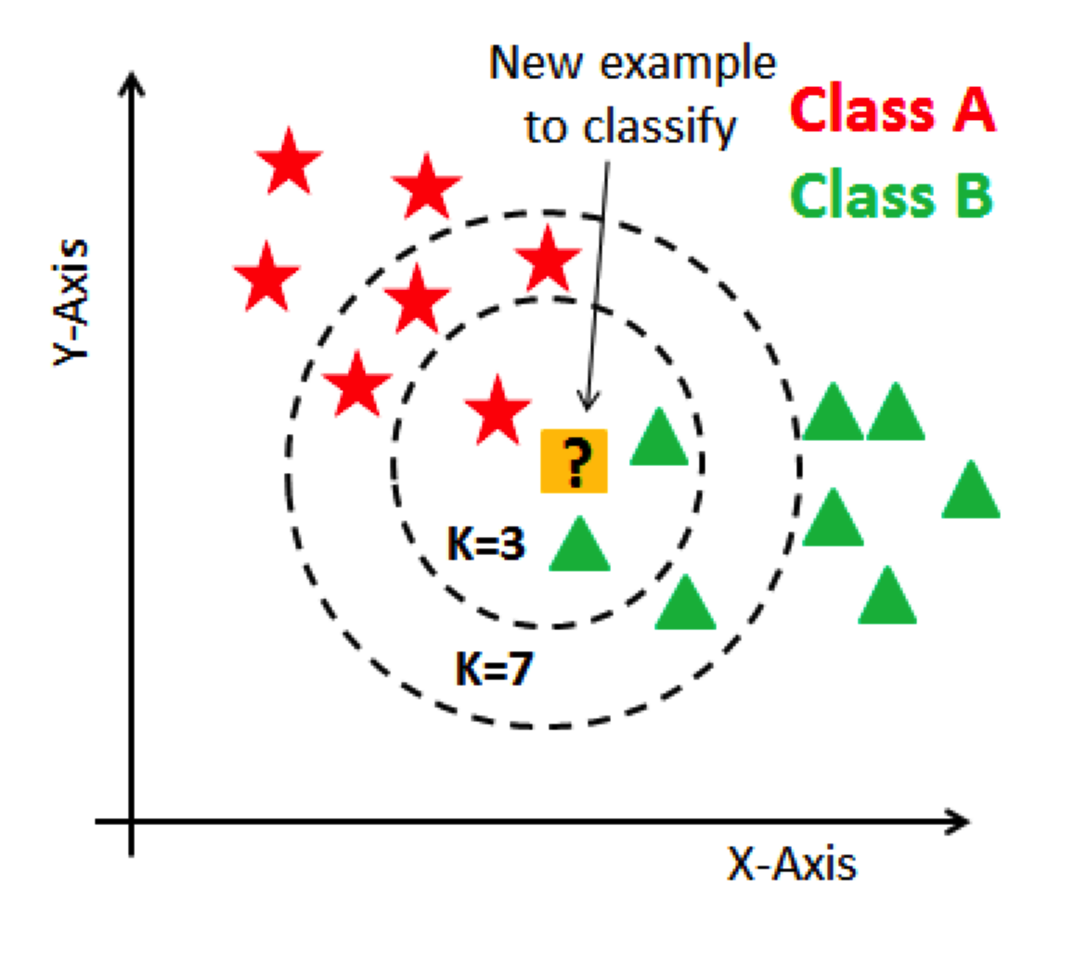

## Baking sharing

In [188]:
bike = pd.read_csv("/content/day.csv")
bike.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [189]:
del bike["casual"]

In [190]:
del bike["registered"]

In [191]:
del bike["instant"]

In [192]:
del bike["dteday"]

In [193]:
bike.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [194]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [195]:
X = bike.drop("cnt", axis=1)
y = bike["cnt"]

In [196]:
lr.fit(
    X=bike.drop("cnt", axis=1),
    y=bike["cnt"]
)

LinearRegression()

In [197]:
lr.score(bike.drop("cnt", axis=1), bike.cnt)

0.8002441102343252

In [198]:
lr.coef_

array([  509.77519829,  2040.70340166,   -38.97956441,  -518.99193125,
          69.0622163 ,   120.35698921,  -610.98700811,  2028.91610348,
        3573.2742884 , -1018.86157122, -2557.56913787])

In [199]:
bike["cnt"]

,cnt
0,985
1,801
2,1349
3,1562
4,1600
...,...
726,2114
727,3095
728,1341
729,1796


In [200]:
lr.predict(X.head())

array([1898.43179733, 1374.42555273, 1512.84490332, 1739.50678714,
       2012.86826922])

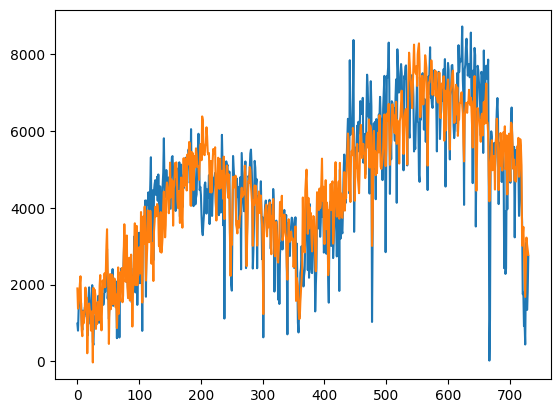

In [201]:
plt.plot(bike["cnt"])
plt.plot(lr.predict(X))

In [202]:
(bike["cnt"] - lr.predict(X)).abs().mean() #para obtener solo un numero usamos .abs() pq si pondriamos solo bike["cnt"] - lr.predict(X).mean() obtendriamos muchos numeros

np.float64(644.9650583269287)

In [203]:
bike["cnt"].mean()

np.float64(4504.3488372093025)

## consumo

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv("/content/consumo.csv", sep=";")

In [ ]:
df.head(3)

,Timestamp,DIASEM,CONSUMO,LLUVIA,TEMPERATURA,ANNO,MES
0,1/1/06 8:00,domingo,"218,7",0,"17,5",2006,1
1,2/1/06 8:00,lunes,"249,2",0,"17,3",2006,1
2,3/1/06 8:00,martes,"269,5",0,16,2006,1


In [ ]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"], dayfirst=True)
df["hora"] = df["Timestamp"].dt.hour
df["dia"] = df["Timestamp"].dt.day
df = df.drop(columns=["Timestamp"])

/tmp/ipython-input-3697522840.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Timestamp"] = pd.to_datetime(df["Timestamp"], dayfirst=True)


In [ ]:
df2 = pd.get_dummies(df, columns=["DIASEM","MES","ANNO"], drop_first=True)

In [ ]:
df2.head(3)

,Timestamp,CONSUMO,LLUVIA,TEMPERATURA,DIASEM_jueves,DIASEM_lunes,DIASEM_martes,DIASEM_miercoles,DIASEM_sabado,DIASEM_viernes,...,ANNO_2008,ANNO_2009,ANNO_2010,ANNO_2011,ANNO_2012,ANNO_2013,ANNO_2014,ANNO_2015,ANNO_2016,ANNO_2017
0,1/1/06 8:00,"218,7",0,"17,5",False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2/1/06 8:00,"249,2",0,"17,3",False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3/1/06 8:00,"269,5",0,16,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
X = df2.drop("CONSUMO", axis=1)
y = df2["CONSUMO"]

In [ ]:
df2.columns

Index(['CONSUMO', 'LLUVIA', 'TEMPERATURA', 'hora', 'dia', 'DIASEM_jueves',
       'DIASEM_lunes', 'DIASEM_martes', 'DIASEM_miercoles', 'DIASEM_sabado',
       'DIASEM_viernes', 'MES_2', 'MES_3', 'MES_4', 'MES_5', 'MES_6', 'MES_7',
       'MES_8', 'MES_9', 'MES_10', 'MES_11', 'MES_12', 'ANNO_2007',
       'ANNO_2008', 'ANNO_2009', 'ANNO_2010', 'ANNO_2011', 'ANNO_2012',
       'ANNO_2013', 'ANNO_2014', 'ANNO_2015', 'ANNO_2016', 'ANNO_2017'],
      dtype='object')

In [ ]:
df["Timestamp"] = pd.to_datetime(
    df["Timestamp"],
    dayfirst=True,
    format="%d/%m/%y %H:%M",
    errors="coerce"   # lo que no encaje se convierte en NaT
)

In [ ]:
for col in ["CONSUMO", "TEMPERATURA", "LLUVIA"]:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(",", ".", regex=False)
        .astype(float)
    )

In [ ]:
df = df.dropna()

In [ ]:
print(df.isna().sum())  # para ver cuántos NaN había
df = df.dropna()

Timestamp      0
DIASEM         0
CONSUMO        0
LLUVIA         0
TEMPERATURA    0
ANNO           0
MES            0
dtype: int64


In [ ]:
from sklearn.linear_model import LinearRegression

X = df.drop("CONSUMO", axis=1)
y = df["CONSUMO"]

lr = LinearRegression()

In [ ]:
lr.fit(X,y)

### again

In [ ]:
for col in ["CONSUMO", "LLUVIA", "TEMPERATURA"]:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(",", ".", regex=False)  # "218,7" -> "218.7"
        .astype(float)
    )

df.dtypes

,0
Timestamp,object
DIASEM,object
CONSUMO,float64
LLUVIA,float64
TEMPERATURA,float64
ANNO,int64
MES,int64


In [ ]:
df["Timestamp"] = pd.to_datetime(
    df["Timestamp"],
    dayfirst=True,          # porque es 1/1/06, 2/1/06...
    errors="coerce"         # si algo raro no se puede parsear -> NaT
)

df["hora"] = df["Timestamp"].dt.hour
df["dia"] = df["Timestamp"].dt.day

/tmp/ipython-input-1747436711.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Timestamp"] = pd.to_datetime(


In [ ]:
df = df.drop(columns=["Timestamp"])

In [ ]:
df = pd.get_dummies(df, columns=["DIASEM"], drop_first=True)

In [ ]:
df.isna().sum()
df = df.dropna()

In [ ]:
df.isna().sum()

,0
CONSUMO,0
LLUVIA,0
TEMPERATURA,0
ANNO,0
MES,0
hora,0
dia,0
DIASEM_jueves,0
DIASEM_lunes,0
DIASEM_martes,0


In [ ]:
df.dtypes

,0
CONSUMO,float64
LLUVIA,float64
TEMPERATURA,float64
ANNO,int64
MES,int64
hora,int32
dia,int32
DIASEM_jueves,bool
DIASEM_lunes,bool
DIASEM_martes,bool


In [ ]:
X = df.drop("CONSUMO", axis=1)
y = df["CONSUMO"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
preds_train = lr.predict(X_train).round(1)

In [ ]:
preds_test = lr.predict(X_test).round(1)

In [ ]:
 rmse_train = ((preds_train - y_train) ** 2).mean().round(1)

In [ ]:
 rmse_train = ((preds_train - y_train) ** 2).mean().round(1)
 rmse_train

np.float64(137.9)

In [ ]:
((preds_test - y_test) ** 2).mean().round(1)

np.float64(126.9)

In [ ]:
y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE (error medio absoluto):", mae)
print("R² (coeficiente de determinación):", r2)

MAE (error medio absoluto): 8.90165970591956
R² (coeficiente de determinación): 0.8032885477635101


In [ ]:
comparacion = pd.DataFrame({
    "real": y_test.values,
    "predicho": y_pred
})
comparacion.head()

,real,predicho
0,267.0,275.594106
1,267.7,267.797785
2,287.2,272.106150
3,238.3,240.714256
4,230.3,233.780615


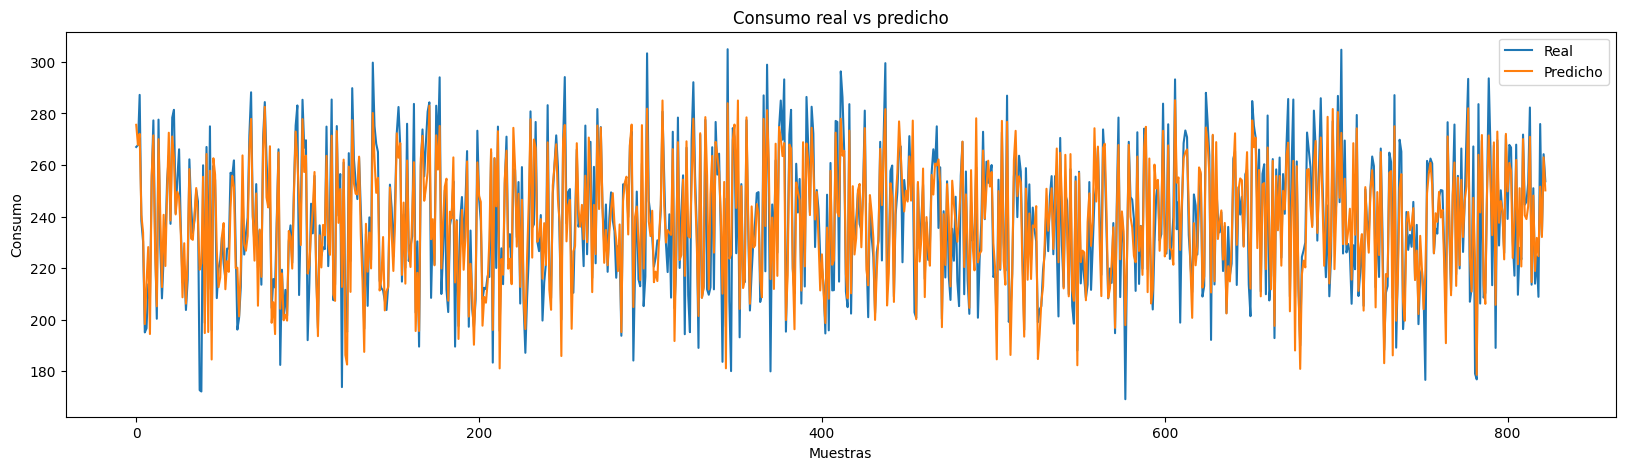

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.plot(y_test.values)          # como plt.plot(bike["cnt"])
plt.plot(lr.predict(X_test))     # como plt.plot(lr.predict(X))

plt.title("Consumo real vs predicho")
plt.xlabel("Muestras")
plt.ylabel("Consumo")
plt.legend(["Real", "Predicho"])
plt.show()

In [ ]:
(y_test- lr.predict(X_test)).abs().mean()

np.float64(8.90165970591956)

In [ ]:
y_test.mean()

np.float64(237.98226002430133)

# Clase 3.

## cancer -log

In [205]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("/content/breast_cancer_bis.csv")

In [206]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [207]:
df2 = df[["mean_radius", "is_cancer"]].copy()

In [208]:
log.fit(X=df2[["mean_radius"]], y=df2.is_cancer)

LogisticRegression()

In [209]:
log.predict(df2[["mean_radius"]])[:5]

array([1, 0, 0, 0, 0])

In [210]:
df2["predic"]=log.predict(df2[["mean_radius"]])

In [211]:
df2["is_correct"]= df2.is_cancer == df2.predic
df2.head(5)

,mean_radius,is_cancer,predic,is_correct
0,17.910,1,1,True
1,10.260,0,0,True
2,14.220,1,0,False
3,9.755,0,0,True
4,9.738,0,0,True


In [212]:
accurancy = df2.is_cancer.sum() / df2.shape[0]

## Hotel

predice canccelacion hibertelizandolo

In [213]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [214]:
import pandas as pd

df = pd.read_csv("/content/hotel.csv")
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [215]:
cols_to_drop = ["reservation_status", "reservation_status_date"]

df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

In [216]:
df = pd.get_dummies(
    df,
    columns=[
        'hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
        'distribution_channel', 'reserved_room_type', 'assigned_room_type',
        'deposit_type', 'customer_type'
    ],
    drop_first=True
)

In [217]:
# 2. Dropear todas las filas con NaN
df = df.dropna()

# 3. Separar X e y AHORA (nunca antes)
y = df["is_canceled"]
X = df.drop(columns=["is_canceled"])

In [218]:
X.head(5)

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
2392,6,2015,42,11,2,0,2,0.0,0,0,...,False,False,False,False,False,False,False,False,True,False
2697,24,2015,44,26,7,15,1,0.0,0,0,...,False,False,False,False,False,False,False,False,False,True
2867,24,2015,45,3,0,3,2,0.0,0,0,...,False,False,False,False,False,False,False,False,False,True
2877,24,2015,45,3,2,10,1,0.0,0,0,...,False,False,False,False,False,False,False,False,False,True
2878,24,2015,45,3,3,10,2,0.0,0,0,...,False,False,False,False,False,False,False,False,False,True


In [219]:
y.isna().sum()

np.int64(0)

In [220]:
y.unique()

array([0, 1])

In [221]:
log = LogisticRegression()
log.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [222]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [223]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.9318181818181818

In [224]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, tree.predict(X_test))
acc = accuracy_score(y_test, tree.predict(X_test))
print(acc)

0.9318181818181818


In [225]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)
log.score(X_test, y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

In [226]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# crear modelo
tree = DecisionTreeClassifier()

# entrenar
tree.fit(X_train, y_train)

# accuracy
print(tree.score(X_test, y_test))

# matriz de confusión
print(confusion_matrix(y_test, tree.predict(X_test)))

# classification report
print(classification_report(y_test, tree.predict(X_test)))

0.9318181818181818
[[41  3]
 [ 0  0]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        44
           1       0.00      0.00      0.00         0

    accuracy                           0.93        44
   macro avg       0.50      0.47      0.48        44
weighted avg       1.00      0.93      0.96        44



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [228]:
print(classification_report(y_test, rf.predict(X_test)))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- adr
- adults
- agent
- arrival_date_day_of_month
- arrival_date_month_August
- ...
Feature names seen at fit time, yet now missing:
- 10x1
- 10x10
- 10x11
- 10x12
- 10x13
- ...


In [229]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# crear modelo
tree = DecisionTreeClassifier()

# entrenar
tree.fit(X_train, y_train)

# accuracy
print(tree.score(X_test, y_test))

# matriz de confusión
print(confusion_matrix(y_test, tree.predict(X_test)))

# classification report
print(classification_report(y_test, tree.predict(X_test)))

0.9318181818181818
[[41  3]
 [ 0  0]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        44
           1       0.00      0.00      0.00         0

    accuracy                           0.93        44
   macro avg       0.50      0.47      0.48        44
weighted avg       1.00      0.93      0.96        44



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [230]:
from sklearn.metrics import confusion_matrix, classification_report

In [231]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)

In [232]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [233]:
param_grid = {
    "max_depth": [3, 5, 8, 12, None],
    "min_samples_split": [2, 10, 20],
    "min_samples_leaf": [1, 5, 10],
    "criterion": ["gini", "entropy", "log_loss"]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    cv=cv,
    scoring="f1",      # puedes cambiar a "accuracy" si quieres
    n_jobs=-1,
    verbose=1
)


In [234]:
grid.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid.best_params_)
print("Mejor F1 (CV):", grid.best_score_)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 2}
Mejor F1 (CV): 0.6171428571428571


In [236]:
gs.fit(X_train y_train)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (ipython-input-3102708578.py, line 1)

### ✅

In [239]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv("hotel.csv")

In [240]:
cols_leakage = ["reservation_status", "reservation_status_date"]
df = df.drop(columns=[c for c in cols_leakage if c in df.columns])

In [241]:
df = df.dropna()

print("Shape después de dropna:", df.shape)


Shape después de dropna: (217, 30)


In [242]:
y = df["is_canceled"]
X = df.drop(columns=["is_canceled"])

In [243]:
cat_cols = X.select_dtypes(include=["object"]).columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

print("Shape X después de dummies:", X.shape)
print("NaN en X:", X.isna().sum().sum())
print("NaN en y:", y.isna().sum())

Shape X después de dummies: (217, 76)
NaN en X: 0
NaN en y: 0


In [244]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Clases en y_train:", y_train.value_counts())
print("Clases en y_test:", y_test.value_counts())


Clases en y_train: is_canceled
0    159
1     14
Name: count, dtype: int64
Clases en y_test: is_canceled
0    41
1     3
Name: count, dtype: int64


In [245]:
tree = DecisionTreeClassifier(
    class_weight="balanced",   # IMPORTANTE PARA QUE MIRE LA CLASE 1
    random_state=42
)

In [246]:
param_grid = {
    "max_depth": [3, 5, 8, 12, None],
    "min_samples_split": [2, 10, 20],
    "min_samples_leaf": [1, 5, 10]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    cv=cv,
    scoring="f1",   # optimizamos F1 de la clase positiva
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("\nMejores hiperparámetros:", grid.best_params_)
print("Mejor F1 (CV):", grid.best_score_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor F1 (CV): 0.4876190476190477


In [247]:
best_tree = grid.best_estimator_
y_pred = best_tree.predict(X_test)

print("\nMatriz de confusión (test):")
print(confusion_matrix(y_test, y_pred))

print("\nClassification report (test):")
print(classification_report(y_test, y_pred, zero_division=0))


Matriz de confusión (test):
[[38  3]
 [ 2  1]]

Classification report (test):
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        41
           1       0.25      0.33      0.29         3

    accuracy                           0.89        44
   macro avg       0.60      0.63      0.61        44
weighted avg       0.90      0.89      0.89        44



## Flight


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("/content/flights.csv")
df.head(3)

/tmp/ipython-input-1081713225.py:6: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/flights.csv")


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [279]:
 df["delayed"] = (df["ARRIVAL_DELAY"] > 15).astype(int)

In [280]:
cols_to_drop = [
    "ARRIVAL_DELAY",      # target original
    "ARRIVAL_TIME",
    "DEPARTURE_TIME",
    "WHEELS_OFF",
    "WHEELS_ON",
    "AIR_TIME",
    "ELAPSED_TIME",
    "CANCELLATION_REASON",
    "AIR_SYSTEM_DELAY",
    "SECURITY_DELAY",
    "AIRLINE_DELAY",
    "LATE_AIRCRAFT_DELAY",
    "WEATHER_DELAY",
    "TAIL_NUMBER",        # demasiado granular
    "FLIGHT_NUMBER",      # no generaliza
    "YEAR"                # en este dataset, siempre 2015
]

In [282]:
df = df.dropna(subset=["ARRIVAL_DELAY"])

In [283]:
df.head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,delayed
0,2015,1,1,4.0,AS,98.0,N407AS,ANC,SEA,5.0,...,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2015,1,1,4.0,AA,2336.0,N3KUAA,LAX,PBI,10.0,...,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2015,1,1,4.0,US,840.0,N171US,SFO,CLT,20.0,...,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [285]:
y = df["delayed"]
X = df.drop(columns=["delayed"])

In [287]:
X.isna().sum()

,0
YEAR,0
MONTH,0
DAY,0
DAY_OF_WEEK,0
AIRLINE,0
FLIGHT_NUMBER,0
TAIL_NUMBER,0
ORIGIN_AIRPORT,0
DESTINATION_AIRPORT,0
SCHEDULED_DEPARTURE,0


In [288]:
delay_cols = [
    "AIR_SYSTEM_DELAY", "SECURITY_DELAY", "AIRLINE_DELAY",
    "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"
]

X[delay_cols] = X[delay_cols].fillna(0)

In [ ]:
X = pd.get_dummies(
    X, columns=["ORIGIN_AIRPORT", "DESTINATION_AIRPORT"],
    drop_first=True
)

In [268]:
y.shape

(582799,)

In [269]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=500)

In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",   # MUY IMPORTANTE
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

In [ ]:
jax_flights.loc[:, "retraso"] = jax_flights[;"departure_delay"]>15

# Clase 4.

## Credit card fraud detention

In [ ]:
import pandas as pd
df = pd.read_csv("/content/creditcard.csv")
df.head(4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0


In [ ]:
del df["Time"]

In [ ]:
df.head(4)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0


In [ ]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [ ]:
df["Class"].value_counts()
#Class = 0 → operación normal | Class = 1 → FRAUDE

,count
Class,
0.0,19812
1.0,85


In [ ]:
X = df.drop("Class", axis=1)
y = df.Class

In [ ]:
# Ver cuántos NaN hay
y.isna().sum()

np.int64(0)

In [ ]:
df = df.dropna()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, #0.2:20% para evaluar
random_state=42, stratify=y)

### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3962    1]
 [   6   11]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3963
         1.0       0.92      0.65      0.76        17

    accuracy                           1.00      3980
   macro avg       0.96      0.82      0.88      3980
weighted avg       1.00      1.00      1.00      3980



[[3962    1]
 [   6   11]]
 - De 3963 casos reales → solo 1 error
 -  Detecta 11 fraudes correctamente,  Falla 6 fraudes (los predice como no fraude)

Detección de fraude obligatoriamente prioriza RECALL, no accuracy,porque:
	-	falso negativo = fraude que NO detectas → pérdida real de dinero
	-falso positivo = marcaste como fraude pero no lo es → se revisa, no pasa nada grave


Precision (fraude): 0.92 → casi todo lo que predices como fraude es FRAUDE, genial.

❌ Recall (fraude): 0.65 → detecta solo el 65% de fraudes, hay margen de mejora.


### oversampling

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

X_train, X_test, y_train, y_test #Aplicar oversampling SOLO en el train (nunca en todo el dataset)

(             V1        V2        V3        V4        V5        V6        V7  \
 3920   0.489315 -1.629232  0.018797 -0.945400 -1.348383 -0.973587  0.318838   
 343   -0.238643 -0.146691  0.829323 -1.776739 -0.080048 -0.747509  0.404431   
 14654 -0.745780  0.396939  2.799396  3.084273 -0.080963  1.360990 -0.445101   
 8142  -0.670177  0.506706  1.789346 -1.013183  0.246276 -0.026728  0.294783   
 11622  0.007666  0.156962  1.796580 -0.570791 -0.276296 -0.083349  0.049052   
 ...         ...       ...       ...       ...       ...       ...       ...   
 9551  -2.215206 -0.090878  1.141761 -0.639123  0.441054 -0.881827 -0.176424   
 11392 -0.912183  1.079287  0.867144  0.372890  0.258944  0.731111  1.478321   
 3879   0.759028 -0.958714  0.797686  0.670241 -1.142203  0.159886 -0.492582   
 4882  -0.911929  1.339144  1.482652 -0.169981  0.191434 -0.370365  0.589987   
 16038 -0.563592  2.179183 -2.317073  1.232388  1.123531 -1.319839  2.073548   
 
              V8        V9       V10  

In [ ]:
smote = SMOTE(random_state=42)

X_train_over, y_train_over = smote.fit_resample(X_train, y_train) #👉 Esto crea una nueva versión del train donde la clase 1 (fraude) se ha “aumentado” artificialmente.

print("Antes:", Counter(y_train))
print("Después:", Counter(y_train_over))

Antes: Counter({0.0: 15849, 1.0: 68})
Después: Counter({0.0: 15849, 1.0: 15849})


In [ ]:
#Entrenar de nuevo el Random Forest con los datos oversampleados

from sklearn.ensemble import RandomForestClassifier

rf_smote = RandomForestClassifier(
    n_estimators=200,
    class_weight=None,      # aquí normalmente se quita "balanced" #(Cuando usas SMOTE, muchas veces ya no hace falta class_weight="balanced", porque el balance ya lo hace SMOTE.)
    random_state=42
)

rf_smote.fit(X_train_over, y_train_over)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_smote = rf_smote.predict(X_test)

print(confusion_matrix(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))

[[3961    2]
 [   5   12]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3963
         1.0       0.86      0.71      0.77        17

    accuracy                           1.00      3980
   macro avg       0.93      0.85      0.89      3980
weighted avg       1.00      1.00      1.00      3980



podemos ver q detectamos MÁS fraudes (11 → 12)

Recall pasó de 0.65 → 0.71.

📌 Antes detectaba 11 de 17 fraudes.
📌 Ahora detecta 12 de 17 fraudes.

👉 Una mejora consistente del recall, que es lo MÁS importante en fraude.

### estilo power

In [ ]:
import pandas as pd
df = pd.read_csv("/content/creditcard.csv")
df.head(4)


import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

In [ ]:
del df["Time"]

In [ ]:
X = df.drop("Class", axis=1)
y = df.Class

In [ ]:
df = df.dropna()

In [ ]:
#  TRAIN / TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
#  APLICAR SMOTE SOLO AL TRAIN
sm = SMOTE(random_state=42)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("Tamaño antes SMOTE:", X_train.shape, y_train.shape)
print("Tamaño después SMOTE:", X_train_over.shape, y_train_over.shape)

In [ ]:
# 9.  GRIDSEARCH (al estilo diapositiva)
grid = {
    "n_estimators": [200, 300, 400, 500],   # número de árboles
    "max_depth": [4, 5, 6, 7, 8]            # profundidad máxima
}

In [ ]:
rf_cv = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=grid,
    scoring="recall",       # optimizamos recall → detectar más fraudes
    cv=5,                   # validación cruzada 5-folds
    verbose=3,
    n_jobs=-1               # usar todos los núcleos
)


In [ ]:
# 10. ENTRENAR GRIDSEARCH CON OVERSAMPLING
rf_cv.fit(X_train_over, y_train_over)

In [ ]:
# 11. MOSTRAR MEJORES PARÁMETROS
print("Mejores parámetros encontrados:", rf_cv.best_params_)
print("Mejor recall (cv):", rf_cv.best_score_)


In [ ]:
# 12. MODELO FINAL
best_rf = rf_cv.best_estimator_

# 13. PREDICCIÓN EN TEST
y_pred = best_rf.predict(X_test)

# 14. MATRIZ DE CONFUSIÓN Y REPORTE
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, recall_score

In [ ]:
df.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0


In [ ]:
rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1        # usar todos los cores
)

In [ ]:
param_grid = {
    "n_estimators": [100, 200, 300], #nº de árboles
    "max_depth": [None, 5, 10, 20], #profundidad máxima del árbol
    "min_samples_split": [2, 5, 10],  #mínimo de muestras para dividir un nodo
    "min_samples_leaf": [1, 2, 4], #mínimo de muestras en una hoja
    "max_features": ["sqrt", "log2"] #nº de variables que se consideran en cada split
}

In [ ]:
recall_scorer = make_scorer(recall_score, pos_label=1) #En fraude nos interesa especialmente recall de la clase 1 → queremos detectar cuantos más fraudes mejo

In [ ]:
#definir validación cruzada estratificada
cv = StratifiedKFold(
    n_splits=3,       # puedes subir a 5 si no tarda mucho
    shuffle=True,
    random_state=42
)

In [ ]:
#Montar el GridSearchCV --- Muy importante: lo hacemos sobre X_train_over, y_train_over (es decir, el train con SMOTE aplicado).

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=recall_scorer,   # optimizamos recall de la clase 1
    cv=cv,
    n_jobs=-1,
    verbose=2
)


In [ ]:
#Entrenar el GridSearch -- tarda un poco porque prueba muchas combinaciones.

grid_search.fit(X_train_over, y_train_over)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring=make_scorer(recall_score, response_method='predict', pos_label=1),
             verbose=2)

In [ ]:
#Ver los mejores parámetros

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor recall (cv):", grid_search.best_score_)

In [ ]:
#Entrenar el modelo final con esos parámetros

best_rf = grid_search.best_estimator_

# Entrenado ya por dentro, pero si quieres ser formal:
best_rf.fit(X_train_over, y_train_over)

In [ ]:
 #Evaluar en el TEST original (sin SMOTE)
from sklearn.metrics import confusion_matrix, classification_report

y_pred_best = best_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

#Aquí deberías ver si: 	sube el recall de la clase 1, se mantiene aceptable la precisión, sigue bien la clase 0 (normalmente sí)

## power

In [ ]:
#  TRAIN / TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
#  APLICAR SMOTE SOLO AL TRAIN
sm = SMOTE(random_state=42)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("Tamaño antes SMOTE:", X_train.shape, y_train.shape)
print("Tamaño después SMOTE:", X_train_over.shape, y_train_over.shape)

In [ ]:
# 9.  GRIDSEARCH (al estilo diapositiva)
grid = {
    "n_estimators": [200, 300, 400, 500],   # número de árboles
    "max_depth": [4, 5, 6, 7, 8]            # profundidad máxima
}

In [ ]:
rf_cv = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=grid,
    scoring="recall",       # optimizamos recall → detectar más fraudes
    cv=5,                   # validación cruzada 5-folds
    verbose=3,
    n_jobs=-1               # usar todos los núcleos
)


In [ ]:
# 10. ENTRENAR GRIDSEARCH CON OVERSAMPLING
rf_cv.fit(X_train_over, y_train_over)

In [ ]:
# 11. MOSTRAR MEJORES PARÁMETROS
print("Mejores parámetros encontrados:", rf_cv.best_params_)
print("Mejor recall (cv):", rf_cv.best_score_)


In [ ]:
# 12. MODELO FINAL
best_rf = rf_cv.best_estimator_

# 13. PREDICCIÓN EN TEST
y_pred = best_rf.predict(X_test)

# 14. MATRIZ DE CONFUSIÓN Y REPORTE
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))